In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from proj1_helpers import *
from implementations import *
from annexe import *
import seaborn as sns

In [5]:
train_set = load_csv_data('/Users/bedanian/Desktop/Machine Learning/Project 1/train.csv', sub_sample = True)
test_set = load_csv_data('/Users/bedanian/Desktop/Machine Learning/Project 1/test.csv', sub_sample = False)

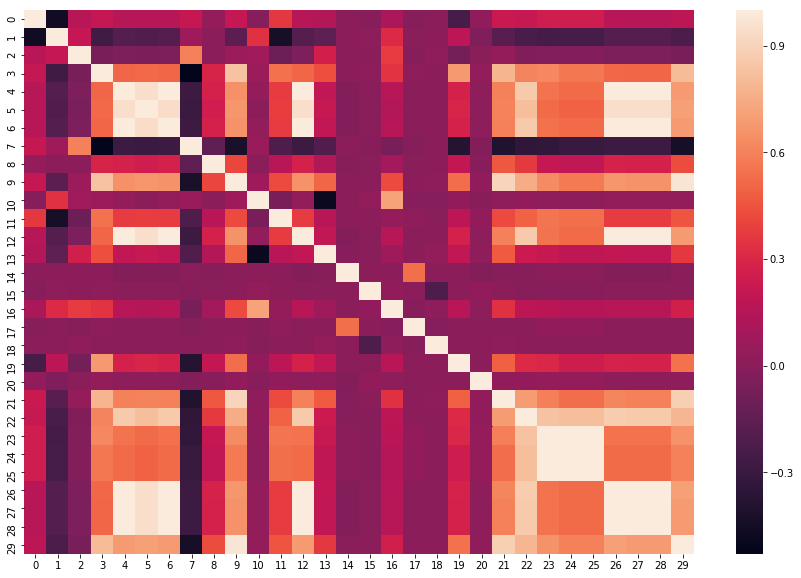

In [3]:
# calculate the correlation matrix
x_train = train_set[1]
y_train = train_set[0]
df = pd.DataFrame(x_train)
corr = df.corr()
# plot the heatmap
plt.figure(1, figsize = (15, 10))
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns)

In [4]:
print(df[22].drop_duplicates())

0     2.0
1     1.0
6     0.0
37    3.0
Name: 22, dtype: float64


In [212]:
def split(data_set, indice,index):
    y_set = data_set[0]
    x_set = data_set[1]
    id_set = data_set[2]
    return (y_set[x_set[:,index] == indice],x_set[x_set[:,index] == indice],id_set[x_set[:,index] == indice])

def replace_mean(x_set):
    x_set[x_set == -999] = np.nan
    list_mean = x_set.mean(axis = 0)
    for i in range(0,len(list_mean)):
        x_set[np.isnan(x_set[:,i])] = list_mean[i]
    return x_set

def get_na_columns(array, threshold, value):
    na_indices = []
    for ind, row in enumerate(array.T):
        count_na = 0
        for j in range(len(row)):
            if row[j] == value:
                count_na += 1
        if (count_na/len(row)) > threshold:
            na_indices.append(ind)
    return na_indices

def standardize(x_train, x_test):
    mean = np.mean(x_train)
    norm = np.linalg.norm(x_train)
    x_train_std = (x_train - mean)/norm
    x_test_std = (x_test - mean)/norm
    return x_train_std, x_test_std

def sigmoid(x):
    return 0.5 * (1 + np.tanh(0.5*x))

def zero_to_neg(array):
    ret = np.zeros(len(array))
    for i, v in enumerate(array):
        if v == 0:
            ret[i] = -1
        else:
            ret[i] = v
    return ret

def dummy(array,index,trigger):
    (array[:,index][array[:,index] < trigger],array[:,index][array[:,index] > trigger]) = (0,1)
    return array

def build_poly(x, degree):
    poly = x
    for deg in range(2, degree+1):
        poly = np.concatenate((poly, np.power(x, deg)), axis = 1)
    return poly

def add_function(x):
    return np.concatenate((x,np.sin(x),np.cos(x)), axis = 1)

def store_columns(array,index):
    store = array[:,index]
    array = np.delete(array, [index] , axis = 1)
    return (store,array)

def visualization(lambda_list, mse_train, mse_test,d):
    plt.semilogx(lambda_list, mse_train, marker=".", color='b', label='train error')
    plt.semilogx(lambda_list, mse_test, marker=".", color='r', label='test error')
    plt.xlabel("lambda")
    plt.ylabel("RMSE")
    plt.title("cross validation using polynome of degree " + str(d))
    plt.legend()
    plt.grid()

def split_data(x, y, ratio = 0.8, seed = 1):
    # set seed
    np.random.seed(seed)
    # generate random indices
    num_row = len(y)
    indices = np.random.permutation(num_row)
    index_split = int(np.floor(ratio * num_row))
    index_tr = indices[: index_split]
    index_te = indices[index_split:]
    # create split
    x_tr = x[index_tr]
    x_te = x[index_te]
    y_tr = y[index_tr]
    y_te = y[index_te]
    return x_tr, x_te, y_tr, y_te

def cross_validation(y_t,x_t,lower,upper,degree,nb,index_to_store = -999,add = False):
    (x_train, x_test, y_train, y_test) = split_data(x_t, y_t, ratio = 0.8, seed = 1)
    if index_to_store != -999:
        (store_train,x_train) = store_columns(x_train,index_to_store)
        (store_test,x_test) = store_columns(x_test,index_to_store)
    x_train = build_poly(x_train, degree)
    x_test = build_poly(x_test, degree)
    if add == True:
        x_train = add_function(x_train)
        x_test = add_function(x_test)
    if index_to_store != -999:
        x_train = np.concatenate((x_train,store_train.reshape(len(store_train),1)), axis = 1)
        x_test = np.concatenate((x_test,store_test.reshape(len(store_test),1)), axis = 1)
    lambda_list = np.logspace(lower, upper, nb)
    rmse_train = []
    rmse_test = []
    for lbd in lambda_list:
        w = ridge_regression(y_train, x_train, lbd)[0]
        loss_train = 2*MSE(y_train, x_train, w)
        loss_test = 2*MSE(y_test, x_test, w)
        rmse_train.append(np.sqrt(loss_train))
        rmse_test.append(np.sqrt(loss_test))
    visualization(lambda_list, rmse_train, rmse_test,degree)
    return [min(rmse_test),lambda_list[np.argmin(rmse_test)]]

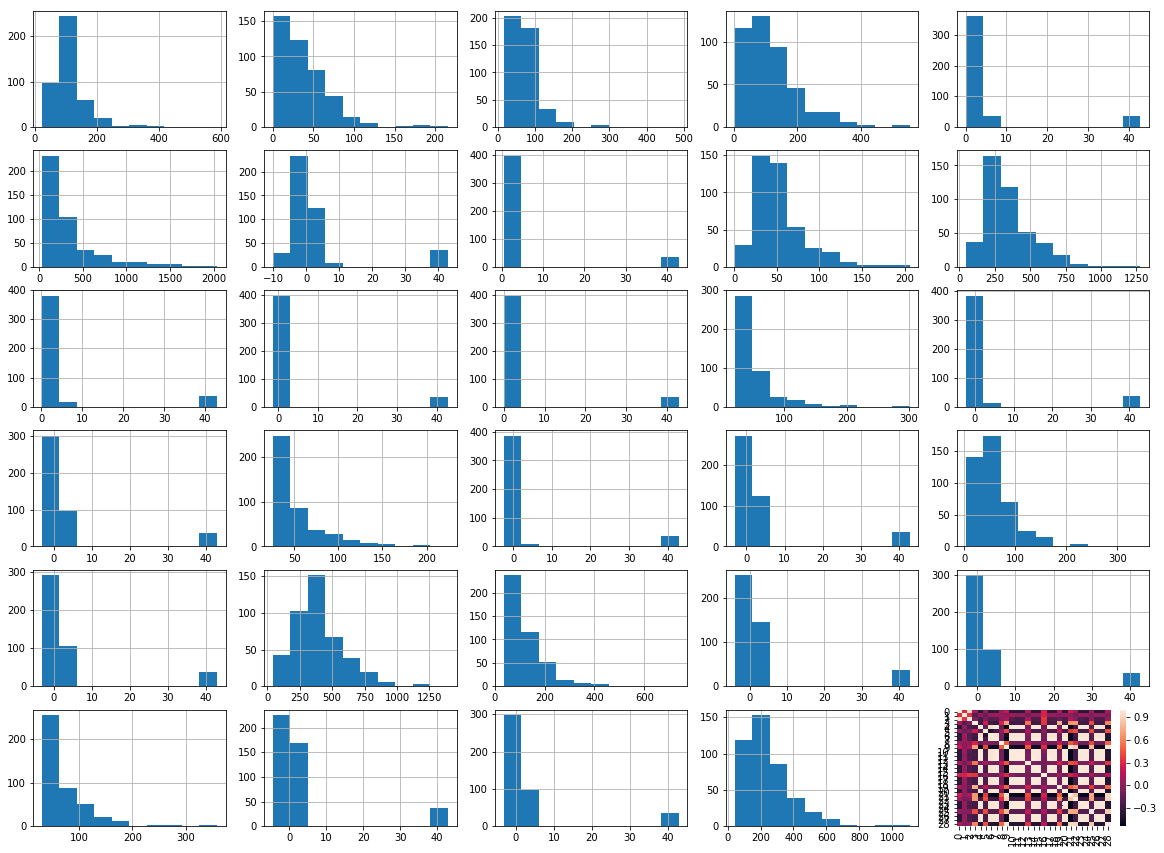

In [215]:
#train
(y_train_0,x_train_0,id_train_0) = split(train_set, 0,22)
(y_train_1,x_train_1,id_train_1) = split(train_set, 1,22)
(y_train_2,x_train_2,id_train_2) = split(train_set, 2,22)
(y_train_3,x_train_3,id_train_3) = split(train_set, 3,22)
#delete column 22
x_train_0 = np.delete(x_train_0, [22] , axis = 1)
x_train_1 = np.delete(x_train_1, [22] , axis = 1)
x_train_2 = np.delete(x_train_2, [22] , axis = 1)
x_train_3 = np.delete(x_train_3, [22] , axis = 1)

#clean column of nan
nan_0 = get_na_columns(x_train_0, 0.90, -999)
x_train_0 = np.delete(x_train_0, nan_0 , axis = 1)
nan_1 = get_na_columns(x_train_1, 0.90, -999)
x_train_1 = np.delete(x_train_1, nan_1 , axis = 1)
nan_2 = get_na_columns(x_train_2, 0.90, -999)
x_train_2 = np.delete(x_train_2, nan_2, axis = 1)
nan_3 = get_na_columns(x_train_3, 0.90, -999)
x_train_3 = np.delete(x_train_3, nan_3, axis = 1)

#cleaning last nan
x_train_0 = replace_mean(x_train_0)
x_train_1 = replace_mean(x_train_1)
x_train_2 = replace_mean(x_train_2)
x_train_3 = replace_mean(x_train_3)

df = pd.DataFrame(x_train_3)
plt.figure(1, figsize = (20, 15))
for k in range(0,df.shape[1]):
    plt.subplot(6,5,k + 1)
    df[k].hist()
plt.subplot(6,5,df.shape[1] + 1)
sns.heatmap(df.corr(), xticklabels = df.corr().columns, yticklabels = df.corr().columns)

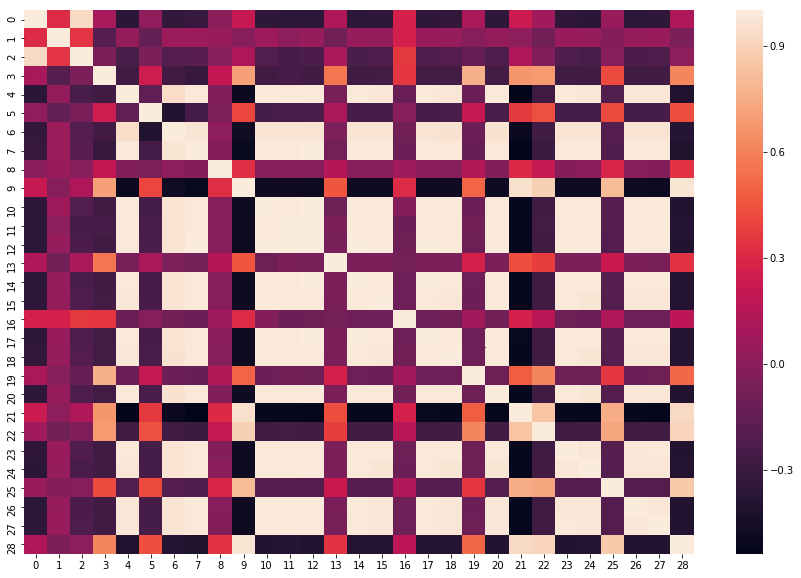

In [206]:
plt.figure(1, figsize = (15, 10))
sns.heatmap(df.corr(), xticklabels = df.corr().columns, yticklabels = df.corr().columns)

In [216]:
#test x0
x_train_0 = np.delete(x_train_0, [7,8,10,11,13,14,16,18] , axis = 1)
x_train_0 = dummy(x_train_0,4,20)

#test x1
x_train_1 = np.delete(x_train_1, [7,8,10,13] , axis = 1)
x_train_1 = np.delete(x_train_1, [10,12,15,16] , axis = 1)
x_train_1 = np.delete(x_train_1, [13] , axis = 1)
x_train_1 = np.delete(x_train_1, [8] , axis = 1)
x_train_1 = dummy(x_train_1,4,20)
x_train_1[:,9] = np.log(x_train_1[:,9])

#test x2
x_train_2[:,2] = np.log(x_train_2[:,2])
x_train_2 = np.delete(x_train_2, [7,10,11,12,14,15,17,18,20,23,24,26,27] , axis = 1)
x_train_2 = np.delete(x_train_2, [15] , axis = 1)
x_train_2[:,0] = np.log(x_train_2[:,0])
x_train_2[:,14] = np.log(x_train_2[:,14])
x_train_2[:,4] = np.sqrt(x_train_2[:,4])

#test x3
x_train_3 = np.delete(x_train_3, [7,10,11,12,14,15,17,18,20,23,24,26,27] , axis = 1)
x_train_3 = dummy(x_train_3,4,20)
x_train_3[:,0] = np.log(x_train_3[:,0])

In [217]:
#standardize
(x_train_0,_) = standardize(x_train_0,x_train_0)
(x_train_1,_) = standardize(x_train_1,x_train_1)
(x_train_2,_) = standardize(x_train_2,x_train_2)
(x_train_3,_) = standardize(x_train_3,x_train_3)

In [219]:
def cross_v(y_t,x_t,degree,lbd):
    (x_train, x_test, y_train, y_test) = split_data(x_t, y_t, ratio = 0.8, seed = 1)
    x_train = build_poly(x_train, degree)
    x_test = build_poly(x_test, degree)
    x_train = add_function(x_train)
    x_test = add_function(x_test)
    w = ridge_regression(y_train, x_train, lbd)[0]
    loss_train = 2*MSE(y_train, x_train, w)
    loss_test = 2*MSE(y_test, x_test, w)
    return (loss_train,loss_test)

In [222]:
cross_v(y_train_2,x_train_2,3,1.006935148416372e-11)

(0.7167161855255736, 0.6959651114874229)

[0.7921830017858837, 3.060151102955673e-16, 0]


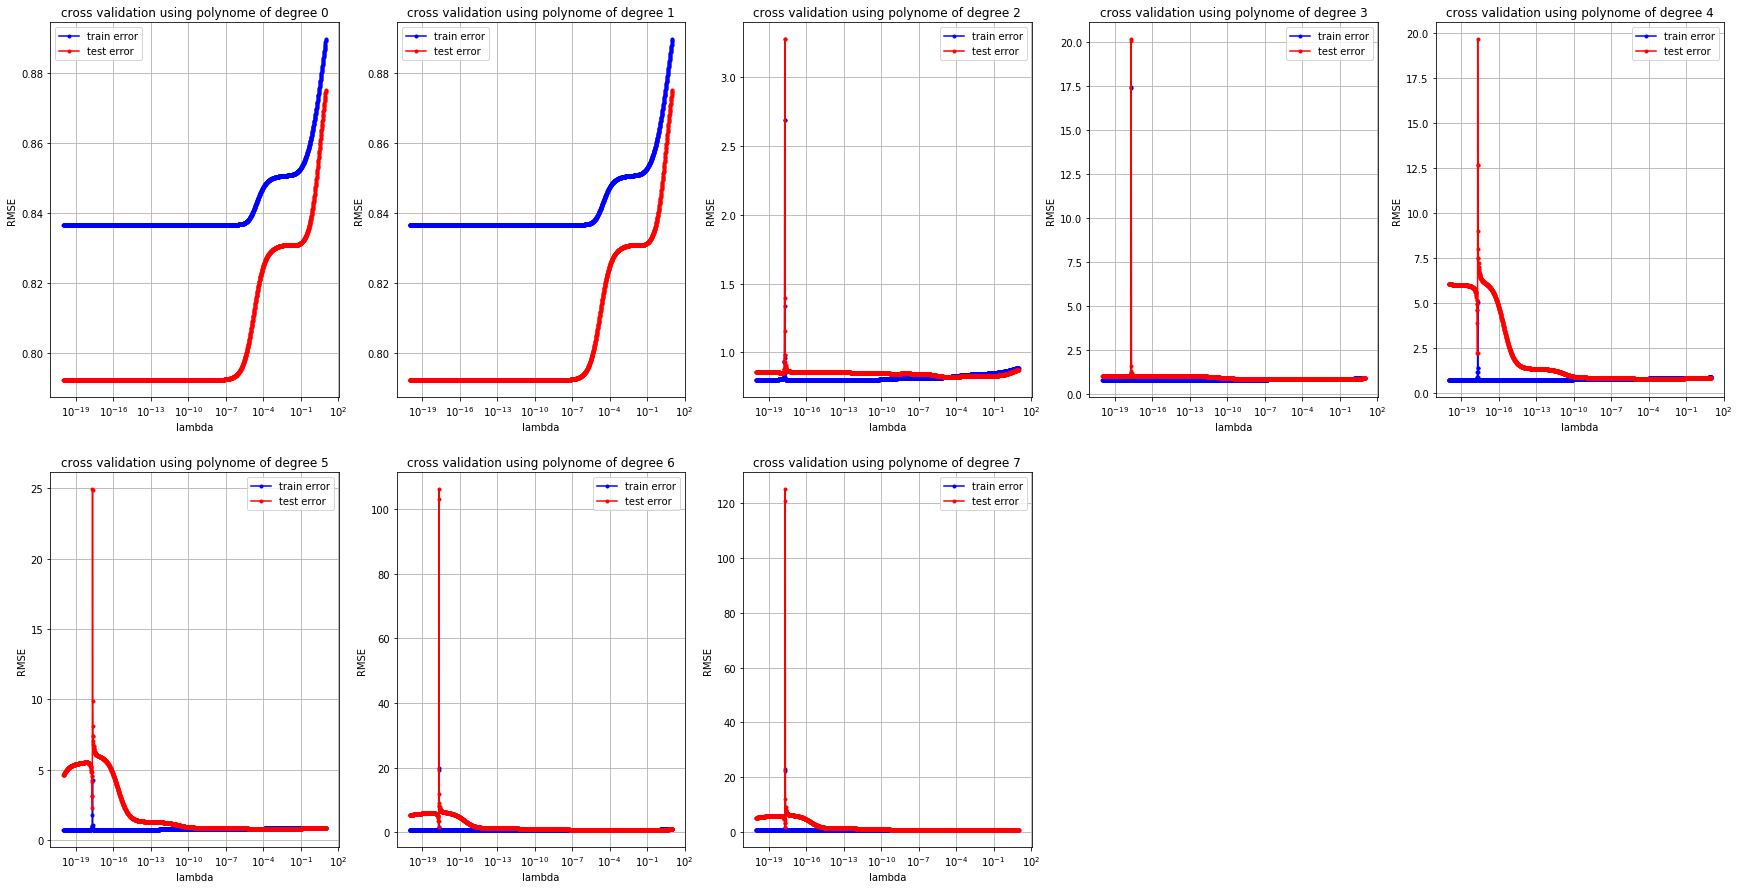

In [204]:
res = []
plt.figure(1, figsize = (30, 40))
for d in range(0,8):
    plt.subplot(5,5,d+1)
    res += [cross_validation(y_train_3,x_train_3,-20,1,d,2000)+[d]]
print(res[np.argmin([row[0] for row in res])])

In [ ]:
#21.10.19
# [0.6877934977110551, 7.653919388230125e-06, 3]
#[0.7827661626070024, 2.2822244741869007e-09, 5]
#[0.8332519193585143, 1.006935148416372e-11, 3]
#[0.7921830017858837, 3.060151102955673e-16, 0]

In [ ]:
#old result 
#0 = [0.6851304706500787, 1e-13, 2]
#1 = [0.761819038241489, 4.2389130573387746e-12, 2]
#2 = [0.8049869465666631, 4.066478091781862e-11, 3]
#3 = [0.8406253743204616, 0.0001593693530381776, 3]